In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
case =pd.read_csv('Case.csv')
p_info = pd.read_csv('PatientInfo.csv')
time = pd.read_csv('Time.csv')
t_age = pd.read_csv('TimeAge.csv')
t_gender = pd.read_csv('TimeGender.csv')
t_provin = pd.read_csv('TimeProvince.csv')
region = pd.read_csv('Region.csv')
weather = pd.read_csv('Weather.csv')
search = pd.read_csv('SearchTrend.csv')
#floating = pd.read_csv('SeoulFloating.csv')
policy = pd.read_csv('Policy.csv')

In [12]:
floating2 = pd.read_csv('floating/Floating_Population_2002.csv')
floating3 = pd.read_csv('floating/Floating_Population_2003.csv')
floating4 = pd.read_csv('floating/Floating_Population_2004.csv')
floating5 = pd.read_csv('floating/Floating_Population_2005.csv')
floating6 = pd.read_csv('floating/Floating_Population_2006.csv')

In [5]:
confirmed = pd.read_csv('floating/real_eng.csv',encoding='CP949')

In [6]:
list_of_dates = ['2020-02-01', '2020-03-01', '2020-04-01']
city = ['Jongno-gu','Jung-gu','Yongsan-gu','Seongdong-gu','Gwangjin-gu','Dongdaemun-gu','Jungnang-gu','Seongbuk-gu','Gangbuk-gu',
        'Dobong-gu','Nowon-gu','Eunpyeong-gu','Seodaemun-gu','Mapo-gu','Yangcheon-gu','Gangseo-gu','Guro-gu','Geumcheon-gu',
        'Yeongdeungpo-gu','Dongjak-gu','Gwanak-gu','Seocho-gu','Gangnam-gu','Songpa-gu','Gangdong-gu']

In [14]:
floating = pd.concat([floating2, floating3, floating4, floating5, floating6])
floating

date  Time(unit=1hour)  Age(unit=10years_old)     sex Province  \
0       20200201               0.0                     60  Female    Seoul   
1       20200201               0.0                     60  Female    Seoul   
2       20200201               0.0                     70    Male    Seoul   
3       20200201               1.0                     40  Female    Seoul   
4       20200201               2.0                     40    Male    Seoul   
...          ...               ...                    ...     ...      ...   
215995  20200630              22.0                     60    Male    Seoul   
215996  20200630              22.0                     70  Female    Seoul   
215997  20200630              23.0                     20  Female    Seoul   
215998  20200630              23.0                     60    Male    Seoul   
215999  20200630              23.0                     70  Female    Seoul   

                 city  Floating_population  \
0        Eunpyeong-gu                29130   
1         Jungnang-gu                24880   
2       Dongdaemun-gu                14740   
3        Yangcheon-gu                43140   
4           Dobong-gu                25320   
...               ...                  ...   
215995   Eunpyeong-gu                22910   
215996     Gangbuk-gu                18330   
215997      Seocho-gu                30840   
215998   Eunpyeong-gu                23050   
215999      Seocho-gu                15850   

        Time(unit=1hour)(1Time(unit=1hour)단위)  
0                                         NaN  
1                                         NaN  
2                                         NaN  
3                                         NaN  
4                                         NaN  
...                                       ...  
215995                                    NaN  
215996                                    NaN  
215997                                    NaN  
215998                                    NaN  
215999                                    NaN  

[1077600 rows x 8 columns]

In [15]:
floating.head()

date  Time(unit=1hour)  Age(unit=10years_old)     sex Province  \
0  20200201               0.0                     60  Female    Seoul   
1  20200201               0.0                     60  Female    Seoul   
2  20200201               0.0                     70    Male    Seoul   
3  20200201               1.0                     40  Female    Seoul   
4  20200201               2.0                     40    Male    Seoul   

            city  Floating_population  Time(unit=1hour)(1Time(unit=1hour)단위)  
0   Eunpyeong-gu                29130                                    NaN  
1    Jungnang-gu                24880                                    NaN  
2  Dongdaemun-gu                14740                                    NaN  
3   Yangcheon-gu                43140                                    NaN  
4      Dobong-gu                25320                                    NaN

In [17]:
#서울에서 일별 평균 이동량
f =floating.groupby('date')[['Floating_population']].mean()
f

Floating_population
date                         
20200201         27145.294444
20200202         26824.380556
20200203         27886.648611
20200204         27889.215278
20200205         27880.240278
...                       ...
20200626         27547.380556
20200627         26276.615278
20200628         26048.809722
20200629         27587.784722
20200630         27981.143056

[150 rows x 1 columns]

In [18]:
#2월 1일부터 6월30일까지 군구별 평균 이동량
g= floating.groupby('city')[['Floating_population']].mean()
g.head()

Floating_population
city                              
Dobong-gu             19953.820295
Dongdaemun-gu         24267.343402
Dongjak-gu            26052.310226
Eunpyeong-gu          27955.616648
Gangbuk-gu            19824.457127

In [20]:
#유동인구수 요약
sum_float= floating.drop(['Time(unit=1hour)','Age(unit=10years_old)','sex','Province','Time(unit=1hour)(1Time(unit=1hour)단위)'],axis=1)
sum_float

date           city  Floating_population
0       20200201   Eunpyeong-gu                29130
1       20200201    Jungnang-gu                24880
2       20200201  Dongdaemun-gu                14740
3       20200201   Yangcheon-gu                43140
4       20200201      Dobong-gu                25320
...          ...            ...                  ...
215995  20200630   Eunpyeong-gu                22910
215996  20200630     Gangbuk-gu                18330
215997  20200630      Seocho-gu                30840
215998  20200630   Eunpyeong-gu                23050
215999  20200630      Seocho-gu                15850

[1077600 rows x 3 columns]

In [79]:
#일별 지역별 평균유동인구
daily_float= sum_float.groupby(['date','city'])[['Floating_population']].sum()
daily_float

Floating_population
date     city                                
20200201 Dobong-gu                    6030830
         Dongdaemun-gu                7003260
         Dongjak-gu                   7796230
         Eunpyeong-gu                 8522520
         Gangbuk-gu                   5966500
...                                       ...
20200630 Seongdong-gu                 6349250
         Songpa-gu                   12579810
         Yangcheon-gu                 7701470
         Yeongdeungpo-gu             10046830
         Yongsan-gu                   5235920

[3750 rows x 1 columns]

In [81]:
#monthly_float2_df (2 = 월)
#2월 지역별 유동인구 추이
monthly_float2=daily_float.loc[20200201:20200229].unstack().sum()
#2월 지역별 유동인구 추이의 데이터프레임 변환
monthly_float2_df= monthly_float2.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float2_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

#3월 지역별 유동인구 추이
monthly_float3=daily_float.loc[20200301:20200331].unstack().sum()
#3월 지역별 유동인구 추이의 데이터프레임 변환
monthly_float3_df= monthly_float3.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float3_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

#4월 지역별 유동인구 추이
monthly_float4=daily_float.loc[20200401:20200430].unstack().sum()
#4월 지역별 유동인구 추이의 데이터프레임 변환
monthly_float4_df= monthly_float4.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float4_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

#5월 지역별 유동인구 추이
monthly_float5=daily_float.loc[20200501:20200531].unstack().sum()
#5월 지역별 유동인구 추이의 데이터프레임 변환
monthly_float5_df= monthly_float5.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float5_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

#6월 지역별 유동인구 추이
monthly_float6=daily_float.loc[20200601:20200630].unstack().sum()
#6월 지역별 유동인구 추이의 데이터프레임 변환
monthly_float6_df= monthly_float6.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float6_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

monthly_float6_df

city  Floating_population
0         Dobong-gu            169804990
1     Dongdaemun-gu            209213140
2        Dongjak-gu            223696390
3      Eunpyeong-gu            237452440
4        Gangbuk-gu            168239810
5       Gangdong-gu            235734060
6        Gangnam-gu            433348580
7        Gangseo-gu            314891060
8      Geumcheon-gu            164073770
9           Guro-gu            253671000
10        Gwanak-gu            280210290
11      Gwangjin-gu            202794850
12        Jongno-gu            160632960
13          Jung-gu            163495700
14      Jungnang-gu            208188810
15          Mapo-gu            245929540
16         Nowon-gu            281826280
17        Seocho-gu            299146150
18     Seodaemun-gu            180981700
19      Seongbuk-gu            243057320
20     Seongdong-gu            184206550
21        Songpa-gu            370432190
22     Yangcheon-gu            231440130
23  Yeongdeungpo-gu            284333290
24       Yongsan-gu            152258940

In [27]:
confirmed.head(1)

number     확진일   확진일.1   확진일1        date  환자번호  국적  환자정보          city  \
0   15356  12.21.  12-21-  12-21  2020-12-21   NaN NaN   NaN  Eunpyeong-gu   

   여행력        접촉력  조치사항   상태 이동경로               등록일               수정일 노출여부  
0  NaN  기타 확진자 접촉   NaN  NaN  NaN  2020-12-22 10:35  2020-12-22 10:35    Y

In [28]:
#서울시 지역별 확진자, 칼럼 요약
sum_confirmed1=confirmed.drop(['환자번호','확진일','확진일.1','확진일1','국적','환자정보','여행력','접촉력','조치사항','상태','이동경로','등록일','수정일','노출여부'], axis=1).iloc[:15356]
sum_confirmed=sum_confirmed1.set_index('date').sort_index().loc['2020-02-01':'2020-06-31'].reset_index()
sum_confirmed.head()

date  number          city
0  2020-02-16      13     Jongno-gu
1  2020-02-16      14     Jongno-gu
2  2020-02-19      15  Seongdong-gu
3  2020-02-19      16     Jongno-gu
4  2020-02-2-       8    the others

In [29]:
#2월1일부터 6월31일까지 일자별, 지역별 확진자수
confirmed_data = sum_confirmed.groupby(['date','city'])[['number']].count()
confirmed_data

number
date       city                   
2020-02-16 Jongno-gu             2
2020-02-19 Jongno-gu             1
           Seongdong-gu          1
2020-02-2- the others            1
2020-02-20 Gangnam-gu            1
...                            ...
2020-06-30 Geumcheon-gu          1
           Gwanak-gu             4
           Mapo-gu               1
           Seocho-gu             1
           Yeongdeungpo-gu       2

[826 rows x 1 columns]

In [42]:
#monthly_confirmed2 (2=월)
#2월 확진자수
monthly_confirmed2 = confirmed_data.loc['2020-02-01':'2020-02-29'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed2.rename(columns = {'city':'city', 0:'number'}, inplace = True)

#3월 확진자수
monthly_confirmed3 = confirmed_data.loc['2020-03-01':'2020-03-31'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed3.rename(columns = {'city':'city', 0:'number'}, inplace = True)

#4월 확진자수
monthly_confirmed4 = confirmed_data.loc['2020-04-01':'2020-04-30'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed4.rename(columns = {'city':'city', 0:'number'}, inplace = True)

#5월 확진자수
monthly_confirmed5 = confirmed_data.loc['2020-05-01':'2020-05-31'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed5.rename(columns = {'city':'city', 0:'number'}, inplace = True)

#6월 확진자수
monthly_confirmed6 = confirmed_data.loc['2020-06-01':'2020-06-30'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed6.rename(columns = {'city':'city', 0:'number'}, inplace = True)

monthly_confirmed6.head()

city  number
0      Dobong-gu    43.0
1  Dongdaemun-gu     4.0
2     Dongjak-gu    13.0
3   Eunpyeong-gu    18.0
4     Gangbuk-gu    10.0

In [75]:
#2월부터 6월까지 각월 총인구이동량과 확진자수
month2 = monthly_float2_df.combine_first(monthly_confirmed2).fillna(0).set_index('city')
month3 = monthly_float3_df.combine_first(monthly_confirmed3).fillna(0).set_index('city').drop('the others')
month4 = monthly_float4_df.combine_first(monthly_confirmed4).fillna(0).set_index('city')
month5 = monthly_float5_df.combine_first(monthly_confirmed5).fillna(0).set_index('city').drop('the others')
month6 = monthly_float6_df.combine_first(monthly_confirmed6).fillna(0).set_index('city').drop('the others')


Floating_population  number
city                                        
Dobong-gu                169804990.0    43.0
Dongdaemun-gu            209213140.0     4.0
Dongjak-gu               223696390.0    13.0
Eunpyeong-gu             237452440.0    18.0
Gangbuk-gu               168239810.0    10.0
Gangdong-gu              235734060.0    11.0
Gangnam-gu               433348580.0     7.0
Gangseo-gu               314891060.0    33.0
Geumcheon-gu             164073770.0    17.0
Guro-gu                  253671000.0    45.0
Gwanak-gu                280210290.0    59.0
Gwangjin-gu              202794850.0     3.0
Jongno-gu                160632960.0     3.0
Jung-gu                  163495700.0     3.0
Jungnang-gu              208188810.0    14.0
Mapo-gu                  245929540.0    12.0
Nowon-gu                 281826280.0    13.0
Seocho-gu                299146150.0    15.0
Seodaemun-gu             180981700.0     8.0
Seongbuk-gu              243057320.0     4.0
Seongdong-gu             184206550.0     9.0
Songpa-gu                370432190.0     7.0
Yangcheon-gu             231440130.0    43.0
Yeongdeungpo-gu          284333290.0    29.0
Yongsan-gu               152258940.0    12.0

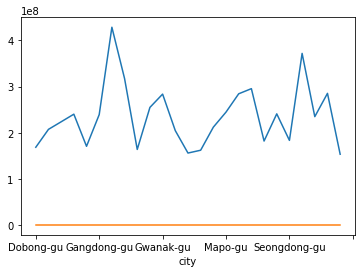

In [74]:

month2["Floating_population"].plot()
month2["number"].plot()

month3["Floating_population"]